### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import resample

### Load Dataset

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Data Visualization

In [6]:
class_counts = df["Class"].value_counts()
print("\nClass Distribution:\n", class_counts)


Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


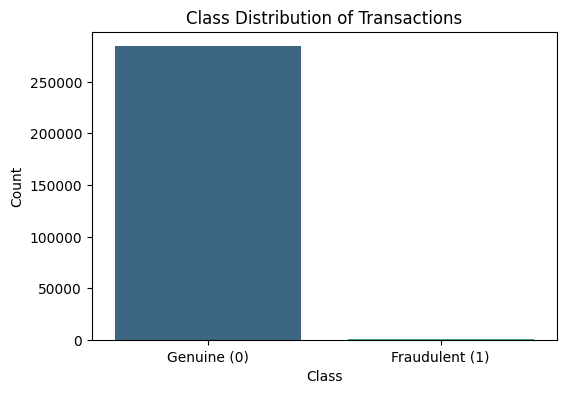

In [7]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks(ticks=[0, 1], labels=["Genuine (0)", "Fraudulent (1)"])
plt.ylabel("Count")
plt.title("Class Distribution of Transactions")
plt.show()


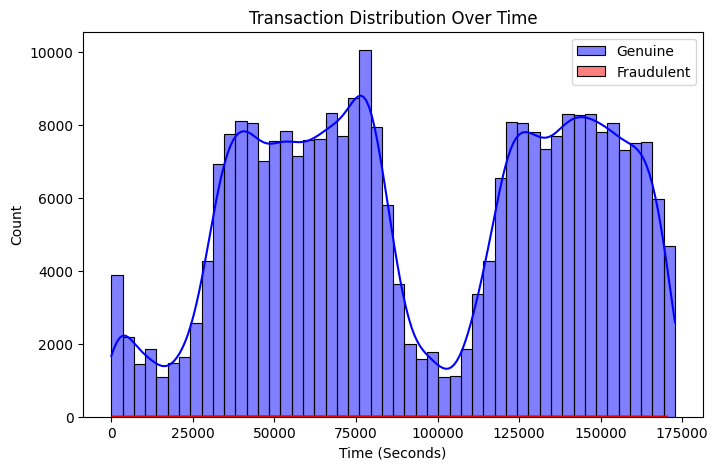

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(df[df["Class"] == 0]["Time"], bins=50, color="blue", label="Genuine", kde=True)
sns.histplot(df[df["Class"] == 1]["Time"], bins=50, color="red", label="Fraudulent", kde=True)
plt.xlabel("Time (Seconds)")
plt.ylabel("Count")
plt.title("Transaction Distribution Over Time")
plt.legend()
plt.show()


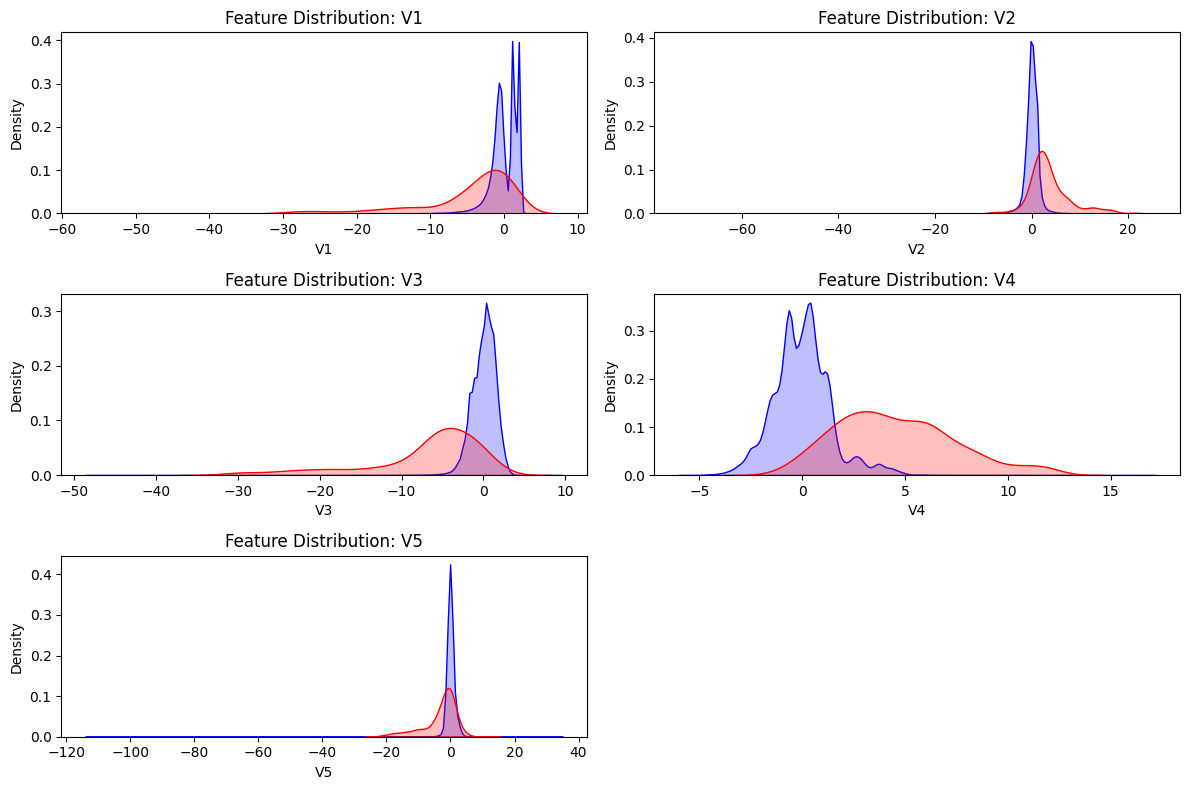

In [9]:
plt.figure(figsize=(12, 8))
for i, feature in enumerate(["V1", "V2", "V3", "V4", "V5"]):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(df[df["Class"] == 0][feature], label="Genuine", shade=True, color="blue")
    sns.kdeplot(df[df["Class"] == 1][feature], label="Fraudulent", shade=True, color="red")
    plt.title(f"Feature Distribution: {feature}")
plt.tight_layout()
plt.show()


### Data Preprocessing

In [11]:
#Normalize Amount and Time
scaler = StandardScaler()
df["Amount"] = scaler.fit_transform(df[["Amount"]])
df["Time"] = scaler.fit_transform(df[["Time"]])

# Separate majority and minority classes
df_majority = df[df["Class"] == 0]
df_minority = df[df["Class"] == 1]




In [12]:
df_majority_downsampled = resample(df_majority, replace=False,n_samples=len(df_minority),random_state=42)

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [13]:
# Separate features and target variable
x = df_balanced.drop(columns=["Class"])
y = df_balanced["Class"]


In [14]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

### Model Training


In [15]:
# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)





LogisticRegression()

In [16]:
# Evaluate the Models
y_pred_knn = knn.predict(X_test)
print("\nKNN Classifier Performance:")
print(classification_report(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

y_pred_log = log_reg.predict(X_test)
print("\nLogistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))


KNN Classifier Performance:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        99
           1       0.98      0.94      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197

Accuracy: 0.9593908629441624

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        99
           1       0.99      0.95      0.97        98

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.97      0.97      0.97       197

Accuracy: 0.9695431472081218


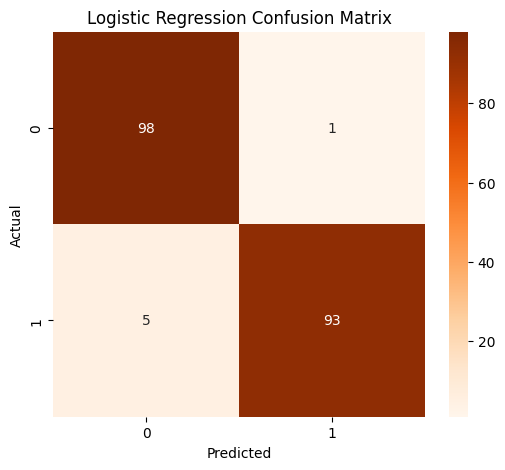

In [17]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Oranges')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

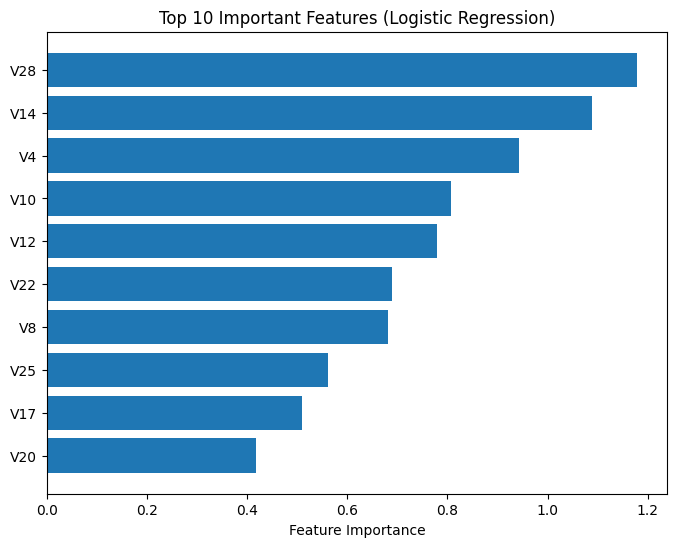

In [18]:
feature_importance = abs(log_reg.coef_[0])
feature_names = x.columns
sorted_idx = np.argsort(feature_importance)[-10:]

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Top 10 Important Features (Logistic Regression)")
plt.show()